In [1]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("c:/data/wine/wine_new.csv")
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [2]:
df["class"].value_counts()

1    855
0    744
Name: class, dtype: int64

In [4]:
train_cols = df.columns[:11] #0~10 필드
print(train_cols)
X = df[train_cols] # 독립변수
y = df["class"]


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)


In [6]:
df2["class"].value_counts()

0    744
1    744
Name: class, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' \n (0: bad, 1: good)')

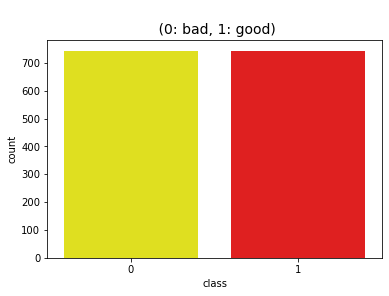

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('class', data=df2, palette=colors)
plt.title(' \n (0: bad, 1: good)', fontsize=14)

In [8]:
train_cols = df.columns[:11] #0~10 필드
X = X_samp[train_cols] # 독립변수
y = y_samp["class"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=10)

In [10]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7445378151260504
0.7449664429530202


<AxesSubplot:>

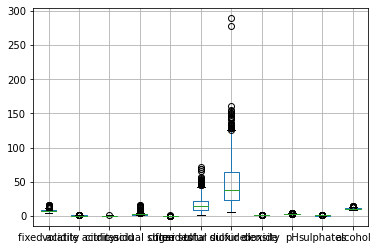

In [12]:
X_train.boxplot()

In [11]:
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)
# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)
# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.190000e+03      1.190000e+03  1.190000e+03    1.190000e+03   
mean   -3.356279e-15      3.933362e-16 -4.277158e-16    3.167401e-16   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.153707e+00     -2.293418e+00 -1.390244e+00   -1.132993e+00   
25%    -6.907913e-01     -7.862384e-01 -9.243934e-01   -4.502770e-01   
50%    -2.226582e-01     -6.055926e-02 -9.621486e-02   -2.454622e-01   
75%     4.795413e-01      6.092984e-01  7.837248e-01    2.762418e-02   
max     4.458672e+00      5.856517e+00  3.785872e+00    8.834659e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.190000e+03         1.190000e+03          1.190000e+03  1.190000e+03   
mean   8.116290e-15        -3.531256e-17          6.400109e-17  4.392937e-13   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.621587e+00        -1.4

<AxesSubplot:>

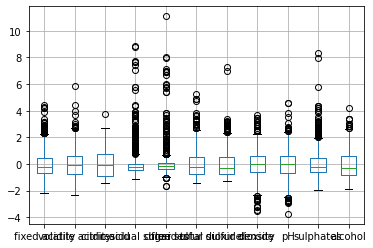

In [13]:
X_train_scaled.boxplot()

In [14]:
model = MLPClassifier(random_state=0, max_iter=5000)
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.980672268907563
0.8187919463087249


In [18]:
model = MLPClassifier(random_state=0, hidden_layer_sizes=[50], max_iter=5000)
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.9512605042016806
0.8389261744966443


idx: 0
 최고정확도: 0.8187919463087249
100 100


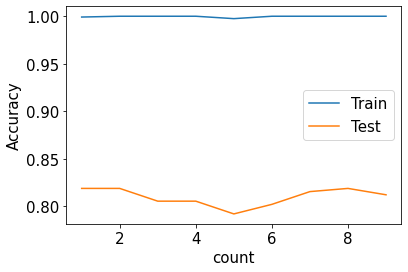

In [19]:
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]
for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): # 두번째 은닉층의 노드수 100~300
        model=MLPClassifier(random_state=0, hidden_layer_sizes=[i,j], max_iter=1000)
        model.fit(X_train_scaled, y_train)
        train_rate.append(model.score(X_train_scaled, y_train))
        test_rate.append(model.score(X_test_scaled, y_test))
plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()
max_rate=max(test_rate) # 최대값
idx=np.where(test_rate == max_rate)[0][0] # 최대값의 인덱스값
print('idx:',idx)
print('최고정확도:',max_rate) 
cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
        cnt+=1